In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kritikseth/fruit-and-vegetable-image-recognition")

print("Path to dataset files:", path)

100%|██████████| 1.98G/1.98G [00:52<00:00, 40.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8


In [ ]:
import tensorflow as tf

In [ ]:
import os

# List all files and folders in the dataset directory
for root, dirs, files in os.walk(path):
    print("Root:", root)
    print("Directories:", dirs)
    print("Files:", files)
    print()


Root: /root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8
Directories: ['test', 'validation', 'train']
Files: []

Root: /root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8/test
Directories: ['banana', 'sweetpotato', 'eggplant', 'spinach', 'bell pepper', 'carrot', 'lemon', 'capsicum', 'cucumber', 'pineapple', 'watermelon', 'potato', 'cauliflower', 'onion', 'orange', 'soy beans', 'apple', 'peas', 'beetroot', 'garlic', 'paprika', 'tomato', 'raddish', 'chilli pepper', 'jalepeno', 'corn', 'lettuce', 'cabbage', 'ginger', 'kiwi', 'pear', 'sweetcorn', 'turnip', 'pomegranate', 'grapes', 'mango']
Files: []

Root: /root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8/test/banana
Directories: []
Files: ['Image_3.jpg', 'Image_9.jpg', 'Image_4.jpg', 'Image_6.jpg', 'Image_2.jpg', 'Image_10.jpg', 'Image_1.jpg', 'Image_5.jpg', 'Image_8.jpg']

Root: /root/.cache/kagglehub/datasets/kritik

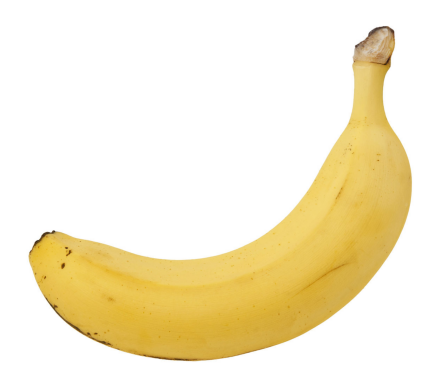

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Path to a sample image
sample_image_path = os.path.join(path, "test", "banana", "Image_3.jpg")

# Open and display the image
img = Image.open(sample_image_path)
plt.imshow(img)
plt.axis("off")
plt.show()


# Simplify the path

In [ ]:
# Base dataset path
base_path = "/root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8"

# Simplified paths
train_path = os.path.join(base_path, "train")
validation_path = os.path.join(base_path, "validation")
test_path = os.path.join(base_path, "test")

In [ ]:
# List contents of train directory
print("Train Directory Contents:")
print(os.listdir(train_path))

# List contents of test directory
print("Test Directory Contents:")
print(os.listdir(test_path))

# Example: Load a file from the test dataset
sample_image_path = os.path.join(test_path, "cabbage", "image_01.jpg")  # Adjust as needed
print("Sample Image Path:", sample_image_path)


Train Directory Contents:
['banana', 'sweetpotato', 'eggplant', 'spinach', 'bell pepper', 'carrot', 'lemon', 'capsicum', 'cucumber', 'pineapple', 'watermelon', 'potato', 'cauliflower', 'onion', 'orange', 'soy beans', 'apple', 'peas', 'beetroot', 'garlic', 'paprika', 'tomato', 'raddish', 'chilli pepper', 'jalepeno', 'corn', 'lettuce', 'cabbage', 'ginger', 'kiwi', 'pear', 'sweetcorn', 'turnip', 'pomegranate', 'grapes', 'mango']
Test Directory Contents:
['banana', 'sweetpotato', 'eggplant', 'spinach', 'bell pepper', 'carrot', 'lemon', 'capsicum', 'cucumber', 'pineapple', 'watermelon', 'potato', 'cauliflower', 'onion', 'orange', 'soy beans', 'apple', 'peas', 'beetroot', 'garlic', 'paprika', 'tomato', 'raddish', 'chilli pepper', 'jalepeno', 'corn', 'lettuce', 'cabbage', 'ginger', 'kiwi', 'pear', 'sweetcorn', 'turnip', 'pomegranate', 'grapes', 'mango']
Sample Image Path: /root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8/test/cabbage/image_01.jpg


# Data Preprocessing
## Train image

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


## Validation Image

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    validation_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


# Building model

In [ ]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 62, 62, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 31, 31, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 36)                  │           9,252 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,629,188 (25.29 MB)

 Trainable params: 6,629,188 (25.29 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 71s 631ms/step - accuracy: 0.0355 - loss: 19.3998 - val_accuracy: 0.0342 - val_loss: 3.5804
Epoch 2/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 70s 588ms/step - accuracy: 0.0327 - loss: 3.5761 - val_accuracy: 0.0855 - val_loss: 3.3761
Epoch 3/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 83s 595ms/step - accuracy: 0.0599 - loss: 3.4886 - val_accuracy: 0.0598 - val_loss: 3.2804
Epoch 4/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 85s 632ms/step - accuracy: 0.0663 - loss: 3.3677 - val_accuracy: 0.1425 - val_loss: 3.0843
Epoch 5/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 62s 633ms/step - accuracy: 0.0838 - loss: 3.2418 - val_accuracy: 0.1396 - val_loss: 3.0587
Epoch 6/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 58s 586ms/step - accuracy: 0.1133 - loss: 3.1410 - val_accuracy: 0.3048 - val_loss: 2.8741
Epoch 7/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 63s 647ms/step - accuracy: 0.1421 - loss: 3.0497 - val_accuracy: 0.2821 - val_loss: 2.7083
Epoch 8/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 646ms/step - accuracy: 0.1801 - loss: 2.9065 - val_acc

# Evaluating Model

In [ ]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

98/98 ━━━━━━━━━━━━━━━━━━━━ 51s 519ms/step - accuracy: 0.9312 - loss: 0.2259
Training accuracy: 0.9280899167060852
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 638ms/step - accuracy: 0.9399 - loss: 0.3053
Validation accuracy: 0.9316239356994629


In [ ]:
# save the model
cnn.save('trained_model.h5')

In [ ]:
training_history.history #Return Dictionary of history

{'accuracy': [0.03402889147400856,
  0.03691813722252846,
  0.055537719279527664,
  0.06516853719949722,
  0.09373997151851654,
  0.1155698224902153,
  0.14703050255775452,
  0.18780095875263214,
  0.2182985544204712,
  0.27255216240882874,
  0.3293739855289459,
  0.37945425510406494,
  0.4436597228050232,
  0.49791333079338074,
  0.5261636972427368,
  0.5727126598358154,
  0.6272873282432556,
  0.6417335271835327,
  0.6741573214530945,
  0.7001605033874512,
  0.7473515272140503,
  0.745746374130249,
  0.77110755443573,
  0.7922953367233276,
  0.8006420731544495,
  0.8112359642982483,
  0.8308185935020447,
  0.8365970849990845,
  0.8487961292266846,
  0.8587480187416077,
  0.8767254948616028,
  0.8626003265380859],
 'loss': [7.418407440185547,
  3.5649216175079346,
  3.4714605808258057,
  3.343205690383911,
  3.233670473098755,
  3.129577398300171,
  2.997236490249634,
  2.880396604537964,
  2.7179861068725586,
  2.481890916824341,
  2.2844338417053223,
  2.090937852859497,
  1.8769388

In [ ]:
# Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [ ]:
# Evaluation for validation
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 93.16239356994629 %


# Visualization loss and accuracy

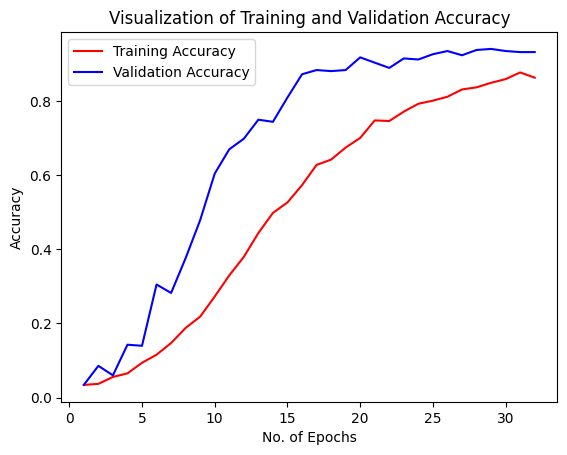

In [ ]:
epochs = [i for i in range(1, 33)]

plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')

plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Visualization of Training and Validation Accuracy')
plt.legend()  # Add a legend to differentiate the lines
plt.show()


# Test set evaluation

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    test_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [ ]:
test_loss, test_accuracy = cnn.evaluate(test_set)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 680ms/step - accuracy: 0.9329 - loss: 0.3502
Test Loss: 0.3700190484523773
Test Accuracy: 0.9303621053695679


# Prediction on image

In [ ]:
test_path

'/root/.cache/kagglehub/datasets/kritikseth/fruit-and-vegetable-image-recognition/versions/8/test'

In [ ]:
import numpy as np

In [ ]:
image_path = f'{test_path}/pineapple/Image_3.jpg'
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(64, 64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)  # Convert image to numpy array
input_arr = np.array([input_arr])  # Convert the single image into a batch of size 1

predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 850ms/step


In [ ]:
print(predictions)

[[3.8580229e-15 5.4446084e-15 1.2646181e-18 9.1028780e-13 6.0179428e-17
  9.4307280e-14 3.0932517e-15 1.1408933e-18 1.3012131e-17 4.4791835e-12
  1.5050225e-11 2.2840052e-17 2.7095766e-14 3.5983468e-17 2.1602356e-16
  3.0450017e-17 7.5385087e-13 1.0119450e-17 1.0296276e-16 1.1018037e-19
  1.5998733e-16 5.1697736e-17 1.1369435e-19 1.7915290e-10 7.9714789e-16
  1.0000000e+00 3.7717249e-25 1.7659323e-17 1.6444635e-14 1.0058310e-14
  5.0574601e-16 3.4528784e-15 5.6994850e-22 3.2809424e-20 9.0984986e-14
  1.0920158e-20]]


In [ ]:
result_index = np.argmax(predictions)  # Return the index of the max element (highest probability)
print(f"Predicted class index: {result_index}")


Predicted class index: 25


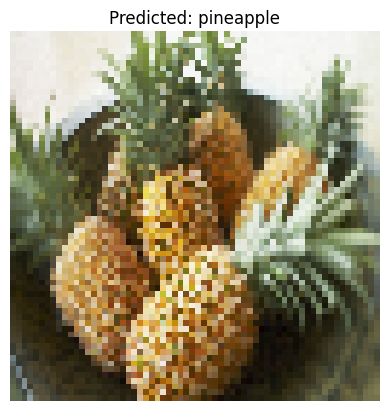

Prediction: It's a pineapple


In [ ]:
plt.imshow(image)  # Display the image
plt.title(f'Predicted: {test_set.class_names[result_index]}')  # Title with predicted class
plt.axis('off')  # Remove axis ticks
plt.show()

print(f"Prediction: It's a {test_set.class_names[result_index]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


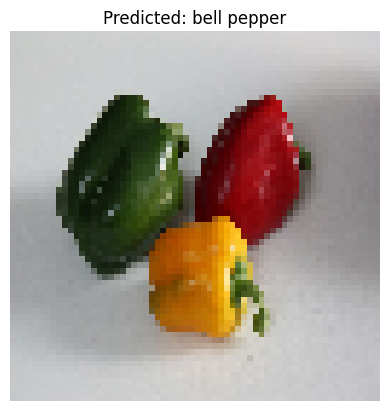

Prediction: It's a bell pepper


In [ ]:
image_path = f'{test_path}/bell pepper/Image_10.jpg'
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(64, 64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)  # Convert image to numpy array
input_arr = np.array([input_arr])  # Convert the single image into a batch of size 1

predictions = cnn.predict(input_arr)
result_index = np.argmax(predictions)

plt.imshow(image)  # Display the image
plt.title(f'Predicted: {test_set.class_names[result_index]}')  # Title with predicted class
plt.axis('off')  # Remove axis ticks
plt.show()

print(f"Prediction: It's a {test_set.class_names[result_index]}")